# Task 4 : Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("twitter_training.csv")
df_valid = pd.read_csv("twitter_validation.csv")

In [3]:
df_train.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [4]:
df_valid.head(5)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
# Naming each column
column_name=['TweetID','Entity','Sentiment','Tweet_Content']
df_train.columns=column_name
df_valid.columns=column_name

In [6]:
# Combining 2 dataframes to 1 dataframe
df=pd.concat([df_train,df_valid],ignore_index=False)
df.head()

,TweetID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        74681 non-null  int64 
 1   Entity         74681 non-null  object
 2   Sentiment      74681 non-null  object
 3   Tweet_Content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        999 non-null    int64 
 1   Entity         999 non-null    object
 2   Sentiment      999 non-null    object
 3   Tweet_Content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


# Data Cleaning

In [9]:
#Checking Null Values
df.isnull().sum()

TweetID            0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64

In [10]:
#Removing Duplicated Values
df.duplicated().sum()

3216

In [11]:
#After removing 
df = df.dropna()
df.isnull().sum()

TweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

[Text(0.5, 1.0, 'Distribution of tweet content length')]

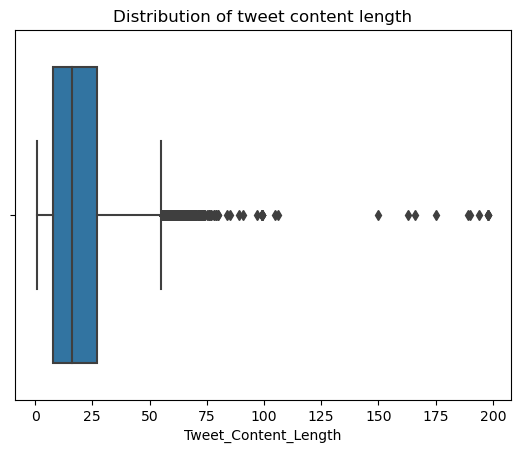

In [12]:
#Identify outliners on tweet content length
df["Tweet_Content_Length"] = df["Tweet_Content"].map(lambda x:len(x.split(" ")))
import seaborn as sns
sns.boxplot(x="Tweet_Content_Length",data=df).set(title='Distribution of tweet content length')

In [13]:
df.drop('Tweet_Content_Length', axis=1, inplace=True)

In [14]:
df

,TweetID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
df.describe()

,TweetID
count,74994.000000
mean,6430.397965
std,3737.514825
min,1.000000
25%,3195.000000
50%,6419.000000
75%,9596.000000
max,13200.000000


In [16]:
df.shape

(74994, 4)

In [17]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            989, 990, 991, 992, 993, 994, 995, 996, 997, 998],
           dtype='int64', length=74994)

In [18]:
df.size

299976

In [19]:
df.isna().sum()

TweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

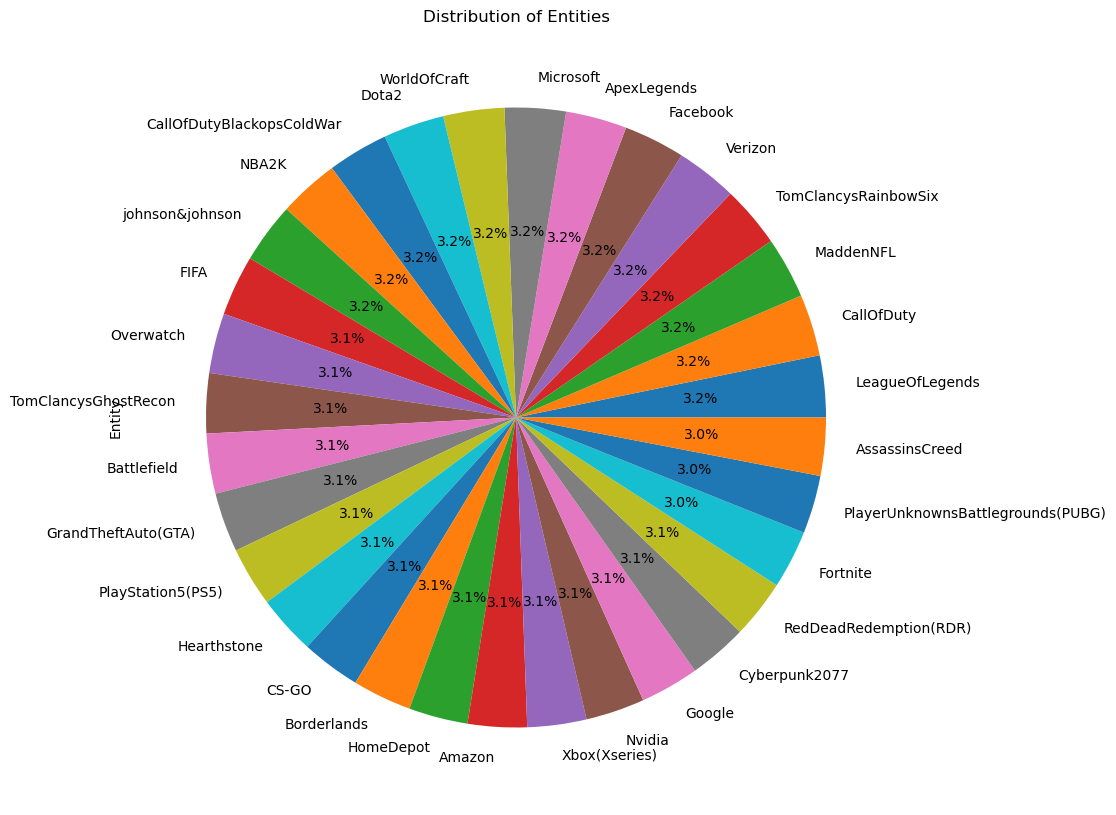

In [20]:
entity_content=df['Entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of Entities')
plt.show()

<Axes: xlabel='Sentiment', ylabel='count'>

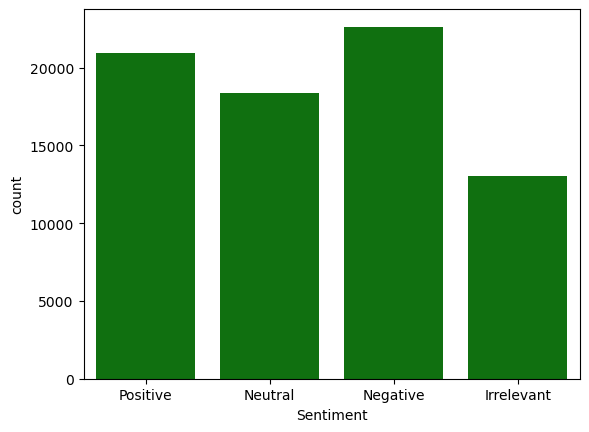

In [21]:
sns.countplot(x='Sentiment', data=df,color='Green')

In [22]:
df.isna().sum()

TweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

# Exploratory Data Analysis

In [23]:
#Before remove
df_duplicated = df.duplicated().sum()
print(f"There are {df_duplicated} duplicate values in the dataset")

There are 2856 duplicate values in the dataset


In [24]:
#After remove
df = df.drop_duplicates()
df_remove_duplicated = df.duplicated().sum()
print(f"There are {df_remove_duplicated} duplicate values in the dataset")

There are 0 duplicate values in the dataset


C:\Users\Sumitha\AppData\Local\Temp\ipykernel_21468\59884814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet content length"] = df['Tweet_Content'].map(lambda x:len(x.split(" ")))


[Text(0.5, 1.0, 'Distribution of tweet content length')]

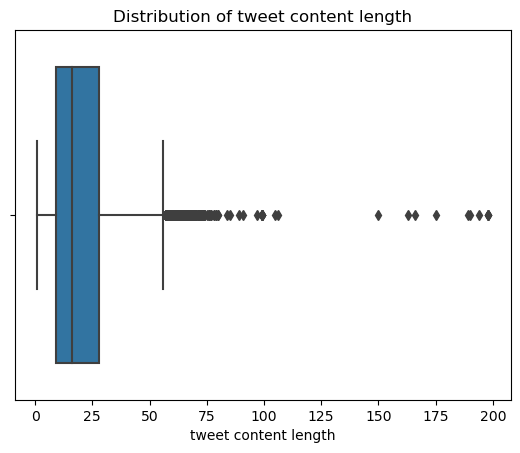

In [25]:
#Removing Outliers
#Identify outliners on tweet content length
df["tweet content length"] = df['Tweet_Content'].map(lambda x:len(x.split(" ")))
sns.boxplot(x="tweet content length",data=df).set(title='Distribution of tweet content length')

In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


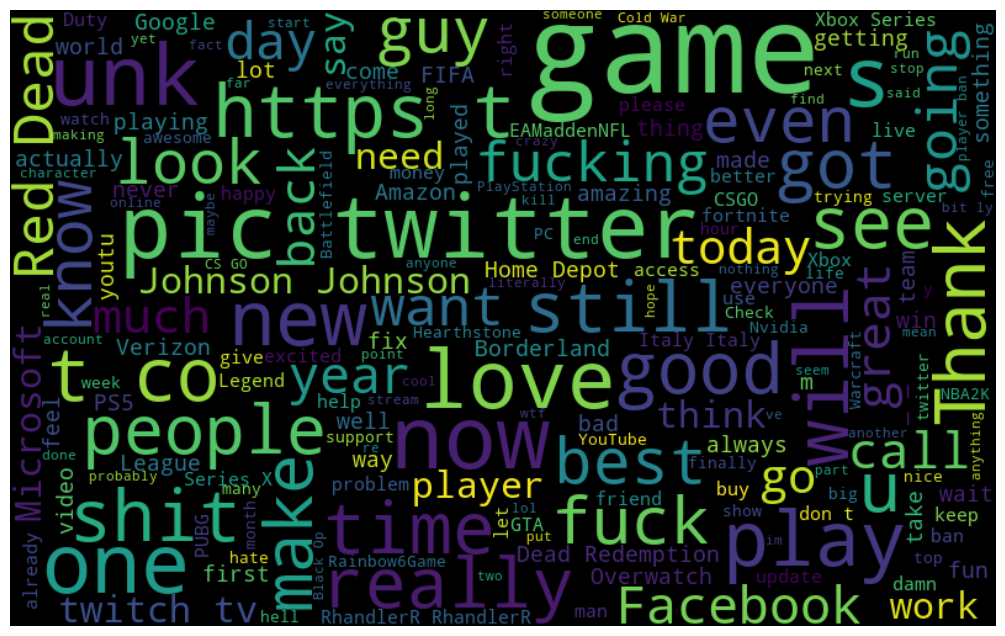

In [27]:
#visualize most frequent word used
from wordcloud import WordCloud
all_words= " " .join([sentence for sentence in df['Tweet_Content']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

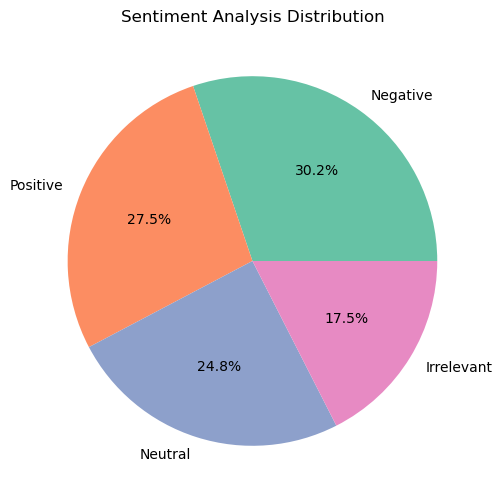

In [28]:
#pie
emotion_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Sentiment Analysis Distribution')
plt.show()

In [29]:
df.describe()

,TweetID,tweet content length
count,72138.000000,72138.000000
mean,6435.525521,19.748926
std,3743.594729,14.448615
min,1.000000,1.000000
25%,3195.000000,9.000000
50%,6432.000000,16.000000
75%,9607.000000,28.000000
max,13200.000000,198.000000


In [30]:
df

,TweetID,Entity,Sentiment,Tweet_Content,tweet content length
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,10
...,...,...,...,...,...
987,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,18
988,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...,21
990,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...,24
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,47


In [31]:
#Using Outlier Formula to remove rows

LQ = np.percentile(df["tweet content length"],25) #Calculating lower_quartile
median = np.percentile(df["tweet content length"],50) #Calculating median
UQ = np.percentile(df["tweet content length"],75) #Calculating upper_quartile


#Calculating interquartile_range(IQR)
IQR = UQ - LQ 
lower_boundary = LQ - 1.5*IQR 
upper_boundary = UQ + 1.5*IQR 

#tweet content length smaller than lower_boundary or larger than upper_boundary will be removed
print("lower_boundary:",lower_boundary)
print("upper_boundary:",upper_boundary)

lower_boundary: -19.5
upper_boundary: 56.5


In [32]:
# Visualize the most positive and negative tweets
most_positive_tweet = df[df['Sentiment'] == df['Sentiment'].max()]['Tweet_Content'].values[0]
most_negative_tweet = df[df['Sentiment'] == df['Sentiment'].min()]['Tweet_Content'].values[0]

print('Most Positive Tweet:')
print(most_positive_tweet)

print('\n Most Negative Tweet:')
print(most_negative_tweet)

Most Positive Tweet:
I am coming to the borders and I will kill you all,

 Most Negative Tweet:
Appreciate the (sonic) concepts / praxis Valenzuela and Landa-Posas thread together in this talk: multimodal listening, soundwalks, borderlands frameworks, participatory action research, and testimonios. . . So many thoughtful and resonant intersections here.. .  


<Axes: xlabel='Sentiment', ylabel='Entity'>

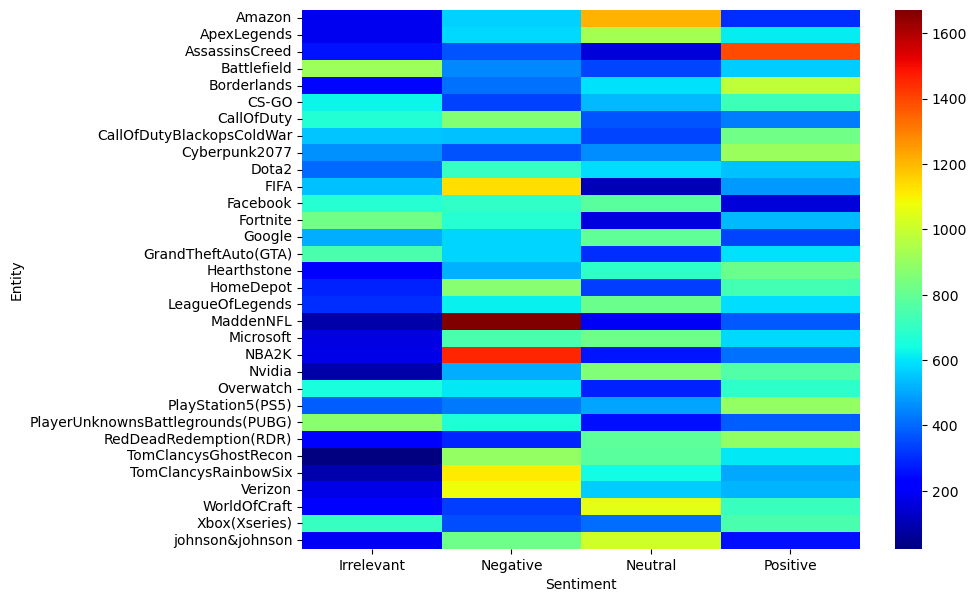

In [33]:
plt.figure(figsize=(9,7))
crosstab = pd.crosstab(index=df['Entity'], columns=df['Sentiment'])
sns.heatmap(crosstab, cmap = 'jet')

In [34]:
crosstab.head()

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,188,566,1210,306
ApexLegends,188,577,927,613
AssassinsCreed,257,366,155,1393
Battlefield,912,449,345,563
Borderlands,239,415,590,977


In [35]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Negative      21790
Positive      19845
Neutral       17879
Irrelevant    12624
Name: Sentiment, dtype: int64


In [36]:
Entity_sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)
print(Entity_sentiment_counts)

Sentiment                          Irrelevant  Negative  Neutral  Positive
Entity                                                                    
Amazon                                    188       566     1210       306
ApexLegends                               188       577      927       613
AssassinsCreed                            257       366      155      1393
Battlefield                               912       449      345       563
Borderlands                               239       415      590       977
CS-GO                                     624       335      530       721
CallOfDuty                                668       865      370       430
CallOfDutyBlackopsColdWar                 548       542      343       823
Cyberpunk2077                             462       361      458       908
Dota2                                     401       709      586       544
FIFA                                      544      1131      103       478
Facebook                 

In [37]:
#Converting Column contents from upper to lower case
df['Tweet_Content'] = df['Tweet_Content'].str.lower()

C:\Users\Sumitha\AppData\Local\Temp\ipykernel_21468\2648011182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet_Content'] = df['Tweet_Content'].str.lower()


In [38]:
df

,TweetID,Entity,Sentiment,Tweet_Content,tweet content length
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,12
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,10
...,...,...,...,...,...
987,7516,LeagueOfLegends,Neutral,♥️ suikoden 2\n1️⃣ alex kidd in miracle world\...,18
988,5708,HomeDepot,Positive,thank you to matching funds home depot rw paym...,21
990,2165,CallOfDuty,Neutral,late night stream with the boys! come watch so...,24
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ toronto is the arts and culture capital of ...,47


In [39]:
#To remove unwanted characters in a column
df['Tweet_Content'] = df['Tweet_Content'].str.replace('[$\*#]', '', regex=True)

C:\Users\Sumitha\AppData\Local\Temp\ipykernel_21468\1937514360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet_Content'] = df['Tweet_Content'].str.replace('[$\*#]', '', regex=True)


In [40]:
df

,TweetID,Entity,Sentiment,Tweet_Content,tweet content length
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,12
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,10
...,...,...,...,...,...
987,7516,LeagueOfLegends,Neutral,♥️ suikoden 2\n1️⃣ alex kidd in miracle world\...,18
988,5708,HomeDepot,Positive,thank you to matching funds home depot rw paym...,21
990,2165,CallOfDuty,Neutral,late night stream with the boys! come watch so...,24
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ toronto is the arts and culture capital of ...,47


In [41]:
df['Tweet_Content'] = df['Tweet_Content'].str.replace(r'[^a-z,A-Z,0-9]',' ', regex=True)

C:\Users\Sumitha\AppData\Local\Temp\ipykernel_21468\828681398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet_Content'] = df['Tweet_Content'].str.replace(r'[^a-z,A-Z,0-9]',' ', regex=True)


In [42]:
df

,TweetID,Entity,Sentiment,Tweet_Content,tweet content length
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,12
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,10
...,...,...,...,...,...
987,7516,LeagueOfLegends,Neutral,suikoden 2 1 alex kidd in miracle world ...,18
988,5708,HomeDepot,Positive,thank you to matching funds home depot rw paym...,21
990,2165,CallOfDuty,Neutral,late night stream with the boys come watch so...,24
994,4891,GrandTheftAuto(GTA),Irrelevant,toronto is the arts and culture capital of ...,47


In [43]:
# Add space at the beginning
df['Tweet_Content'] = ' ' + df['Tweet_Content']

# Add space at the end
df['Tweet_Content'] = df['Tweet_Content'] + ' '

# Add space in between
df['Tweet_Content'] = df['Tweet_Content'].replace(' ', '  ')

C:\Users\Sumitha\AppData\Local\Temp\ipykernel_21468\738719089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet_Content'] = ' ' + df['Tweet_Content']
C:\Users\Sumitha\AppData\Local\Temp\ipykernel_21468\738719089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet_Content'] = df['Tweet_Content'] + ' '
C:\Users\Sumitha\AppData\Local\Temp\ipykernel_21468\738719089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [44]:
df

,TweetID,Entity,Sentiment,Tweet_Content,tweet content length
0,2401,Borderlands,Positive,i am coming to the borders and i will kill yo...,12
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you...,10
2,2401,Borderlands,Positive,im coming on borderlands and i will murder yo...,10
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder...,12
4,2401,Borderlands,Positive,im getting into borderlands and i can murder ...,10
...,...,...,...,...,...
987,7516,LeagueOfLegends,Neutral,suikoden 2 1 alex kidd in miracle world ...,18
988,5708,HomeDepot,Positive,thank you to matching funds home depot rw pay...,21
990,2165,CallOfDuty,Neutral,late night stream with the boys come watch s...,24
994,4891,GrandTheftAuto(GTA),Irrelevant,toronto is the arts and culture capital of...,47


In [45]:
#Removing Numbers from tweet content
def remove_numbers(Tweet_Content):
    return ''.join(ch for ch in Tweet_Content if not ch.isdigit())

In [46]:
df['Tweet_Content'] = df['Tweet_Content'].apply(remove_numbers)

C:\Users\Sumitha\AppData\Local\Temp\ipykernel_21468\2291752226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet_Content'] = df['Tweet_Content'].apply(remove_numbers)


In [47]:
df

,TweetID,Entity,Sentiment,Tweet_Content,tweet content length
0,2401,Borderlands,Positive,i am coming to the borders and i will kill yo...,12
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you...,10
2,2401,Borderlands,Positive,im coming on borderlands and i will murder yo...,10
3,2401,Borderlands,Positive,im getting on borderlands and i will murder ...,12
4,2401,Borderlands,Positive,im getting into borderlands and i can murder ...,10
...,...,...,...,...,...
987,7516,LeagueOfLegends,Neutral,suikoden alex kidd in miracle world ...,18
988,5708,HomeDepot,Positive,thank you to matching funds home depot rw pay...,21
990,2165,CallOfDuty,Neutral,late night stream with the boys come watch s...,24
994,4891,GrandTheftAuto(GTA),Irrelevant,toronto is the arts and culture capital of...,47


In [48]:
sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)
sentiment_counts

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,188,566,1210,306
ApexLegends,188,577,927,613
AssassinsCreed,257,366,155,1393
Battlefield,912,449,345,563
Borderlands,239,415,590,977
CS-GO,624,335,530,721
CallOfDuty,668,865,370,430
CallOfDutyBlackopsColdWar,548,542,343,823
Cyberpunk2077,462,361,458,908


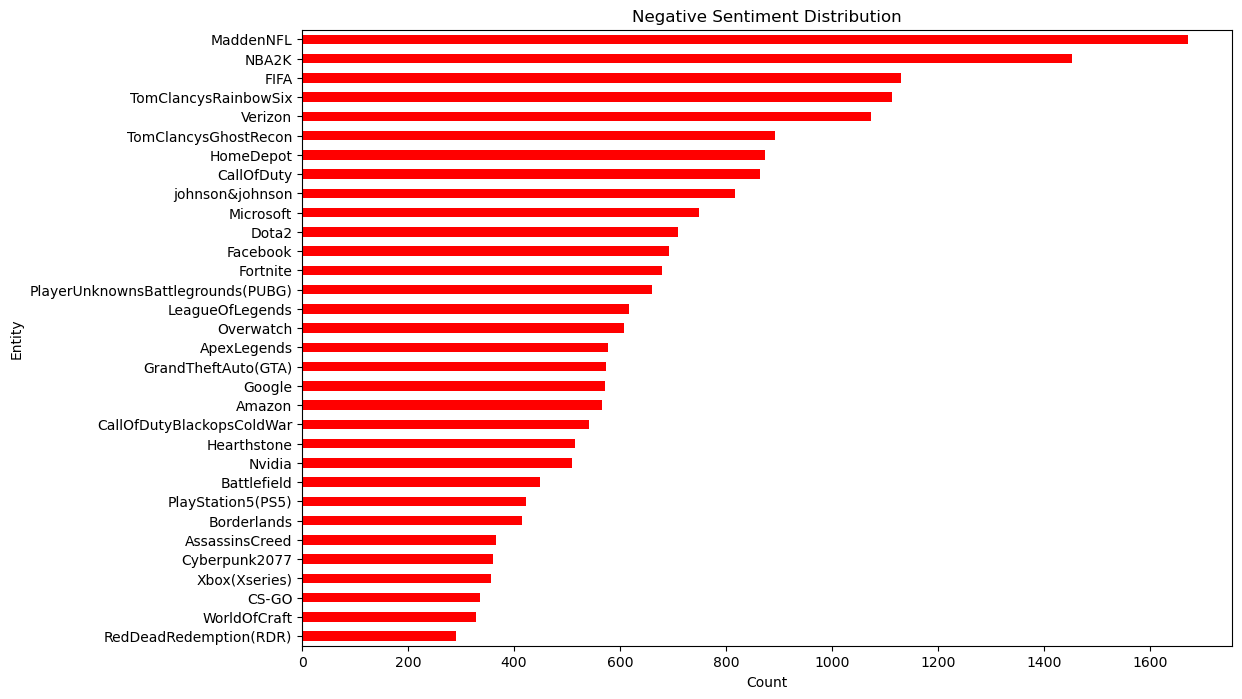

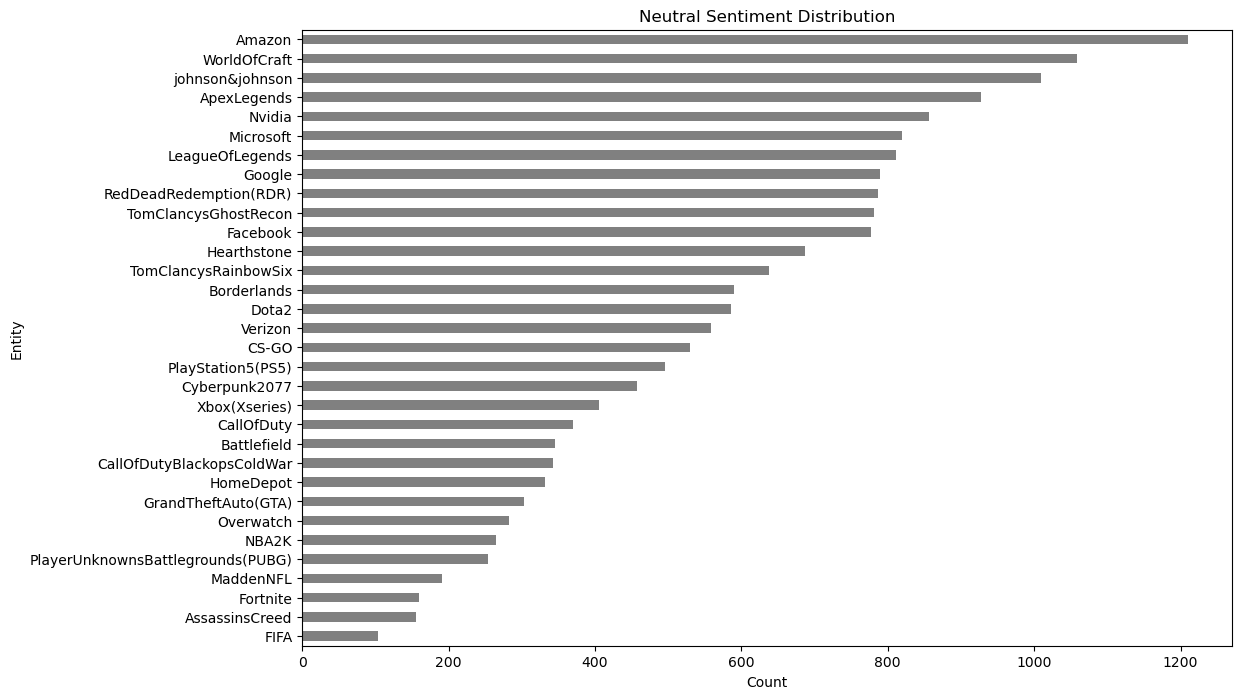

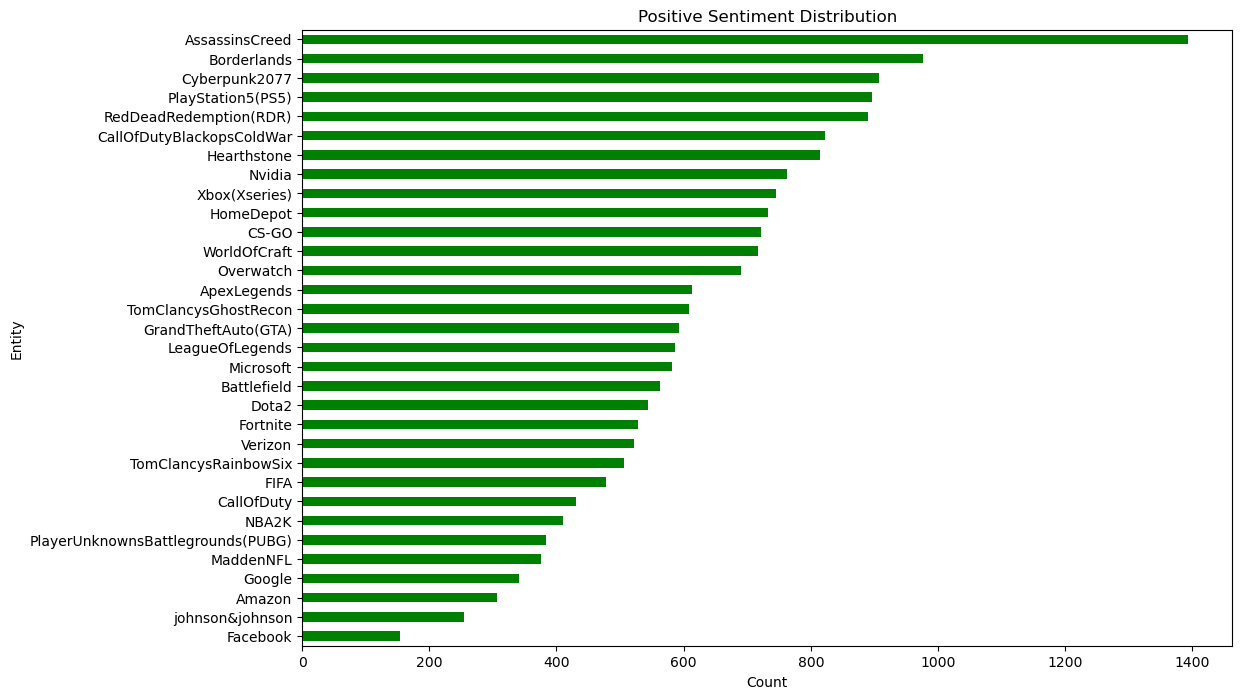

In [49]:
for sentiment in ['Negative', 'Neutral', 'Positive']:
    plt.figure(figsize=(12, 8))
    sentiment_counts[sentiment].sort_values().plot(kind='barh', color={'Negative': 'red', 'Neutral': 'gray', 'Positive': 'green'}[sentiment])
    plt.title(f'{sentiment} Sentiment Distribution')
    plt.xlabel('Count')
    plt.ylabel('Entity')
    plt.show()

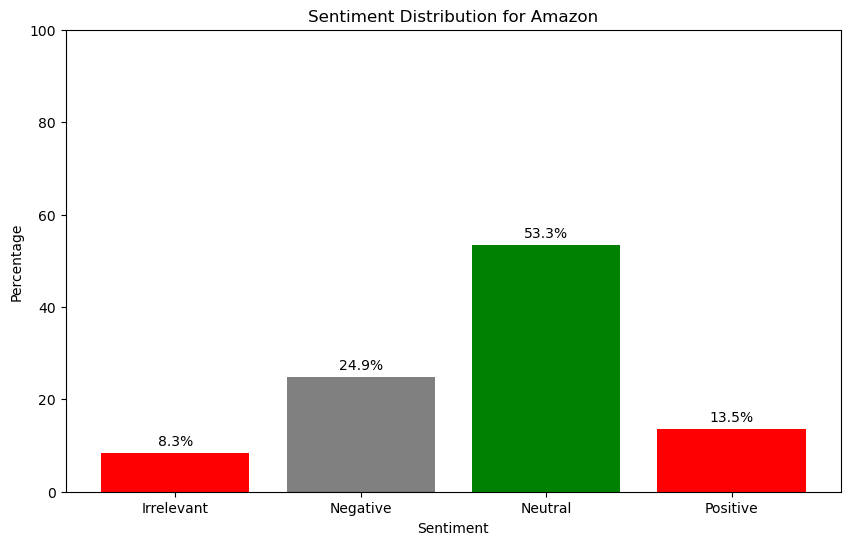

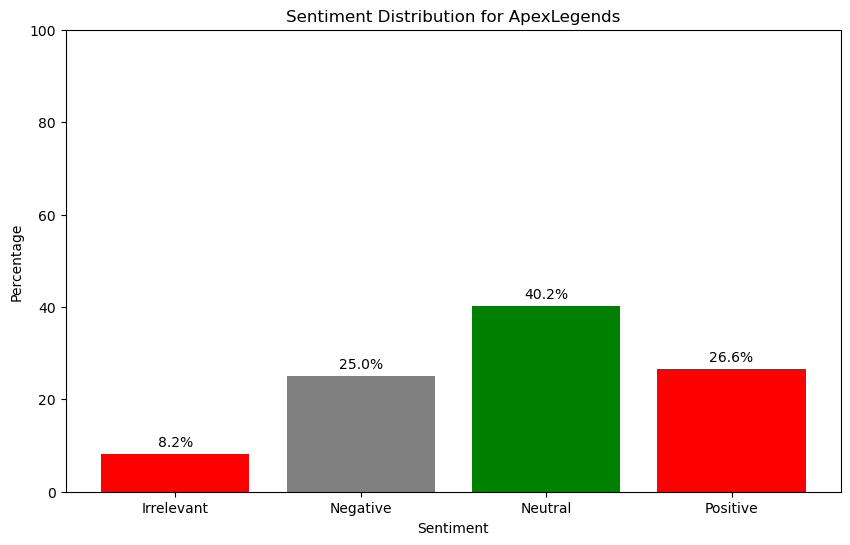

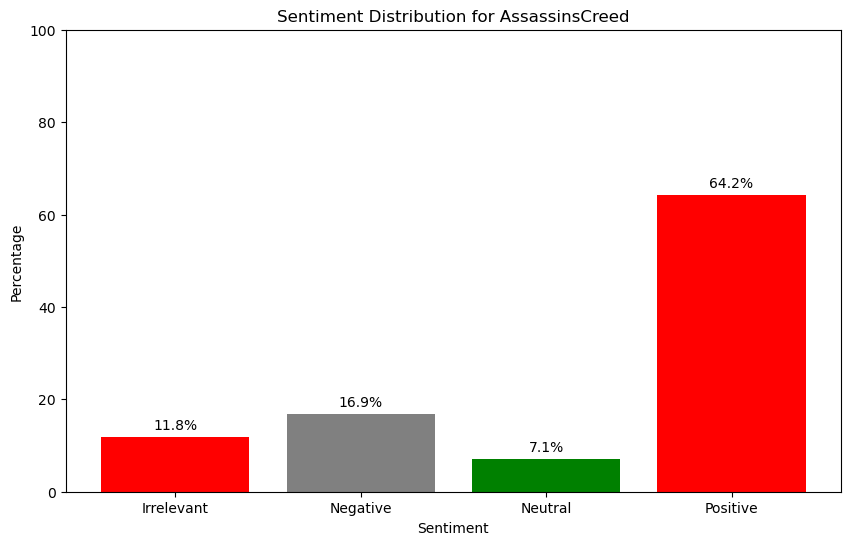

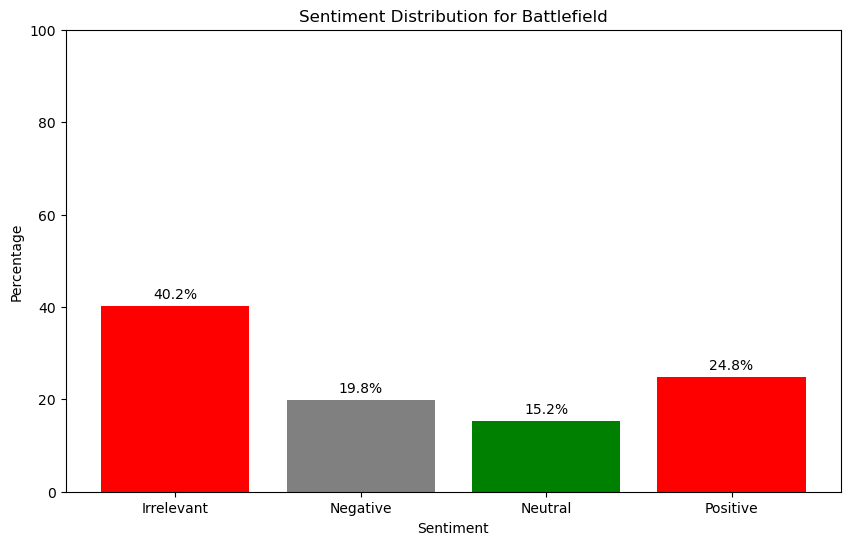

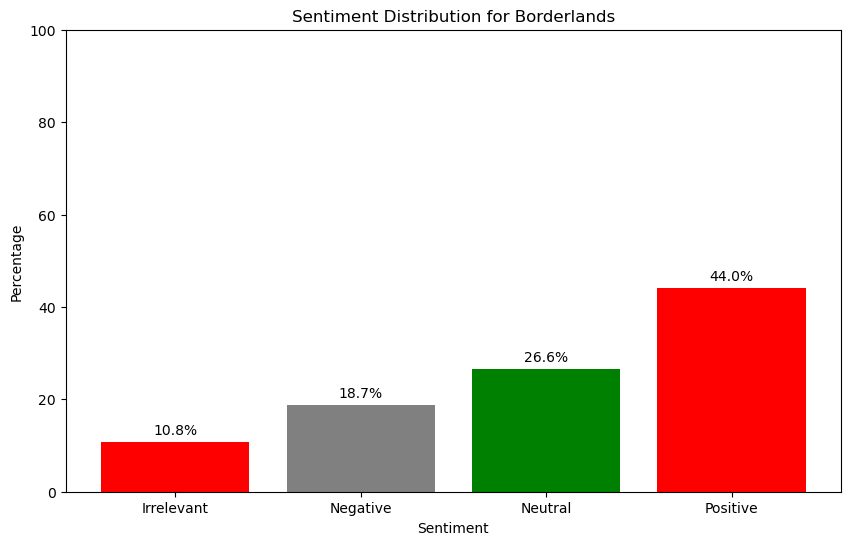

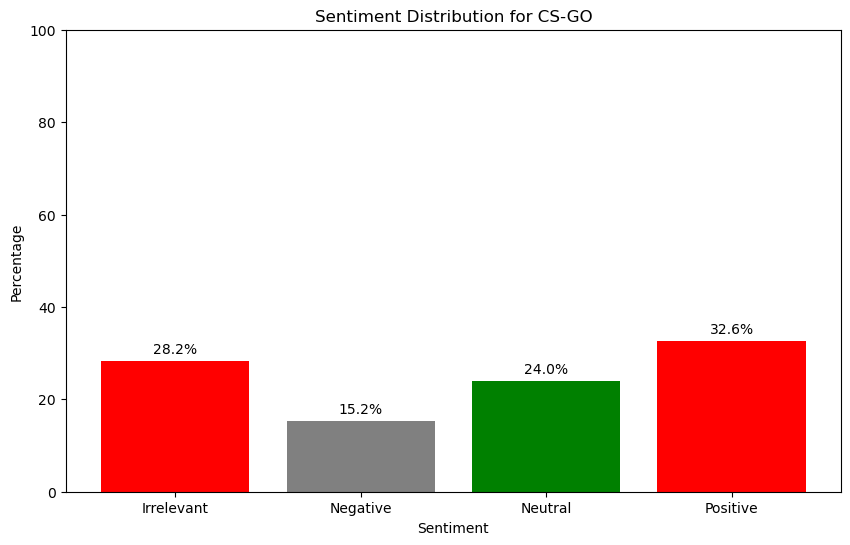

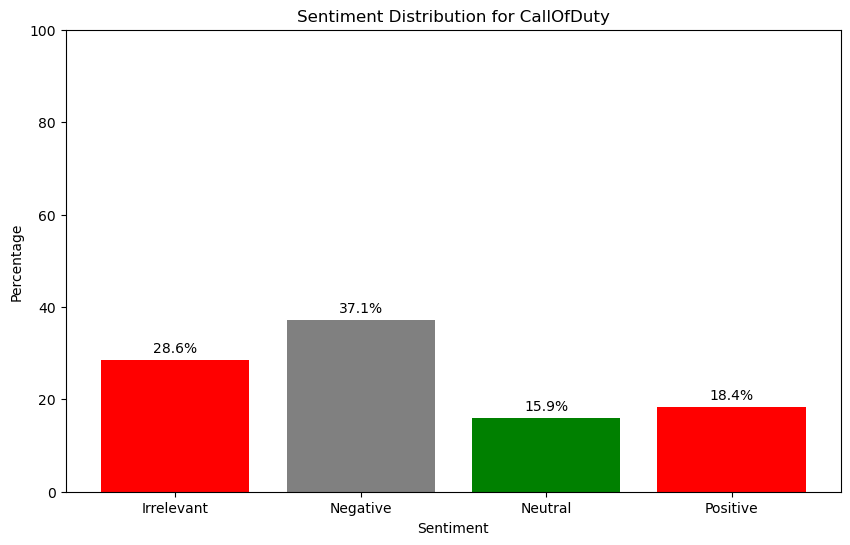

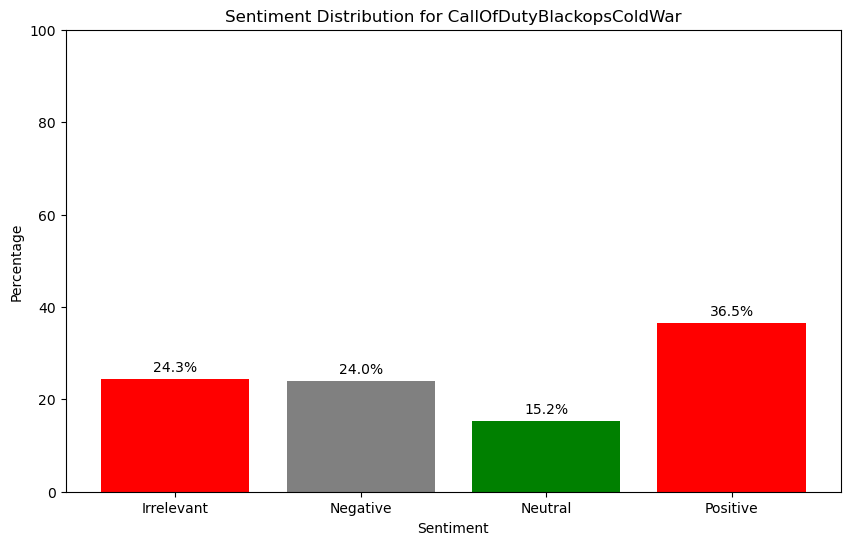

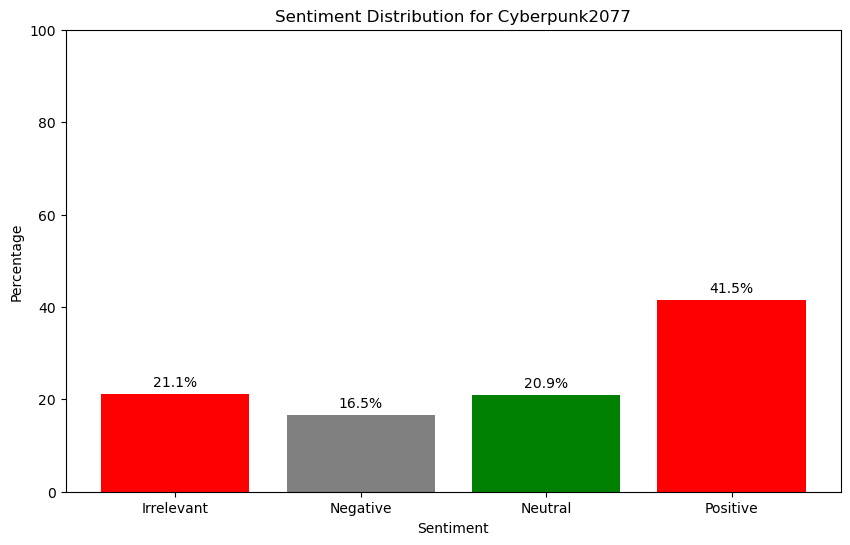

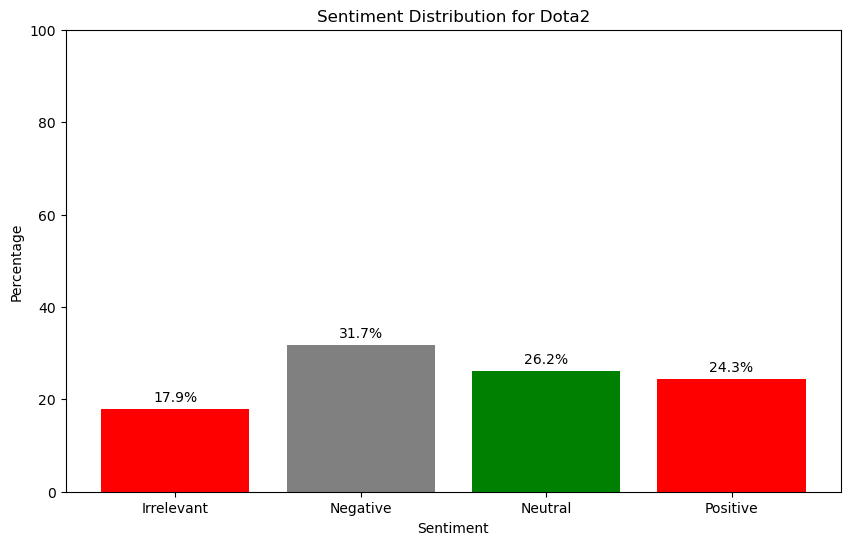

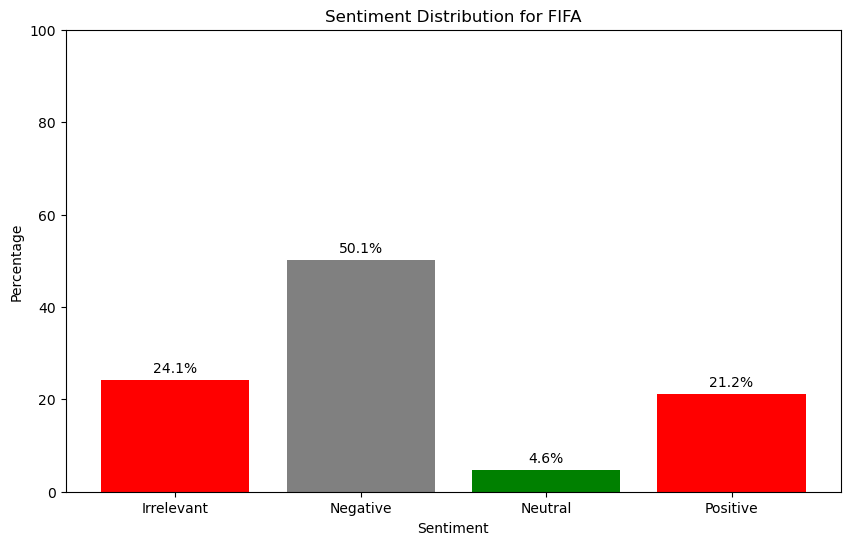

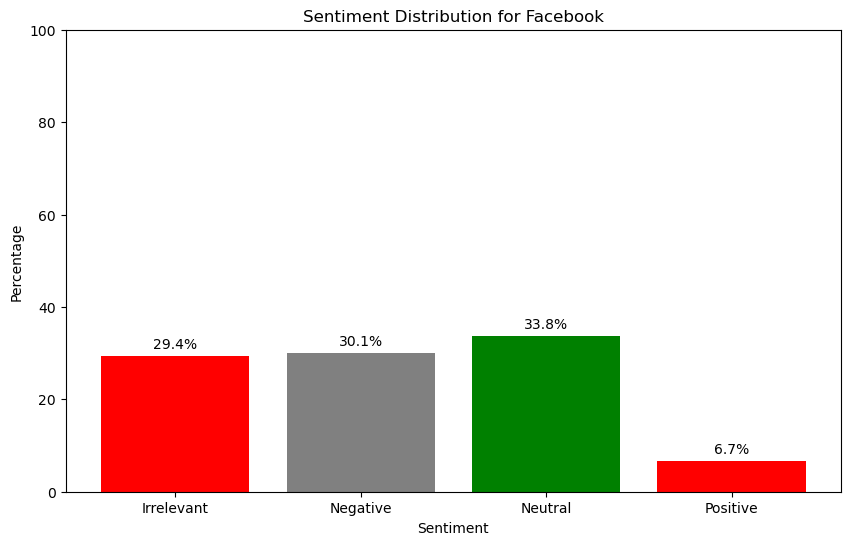

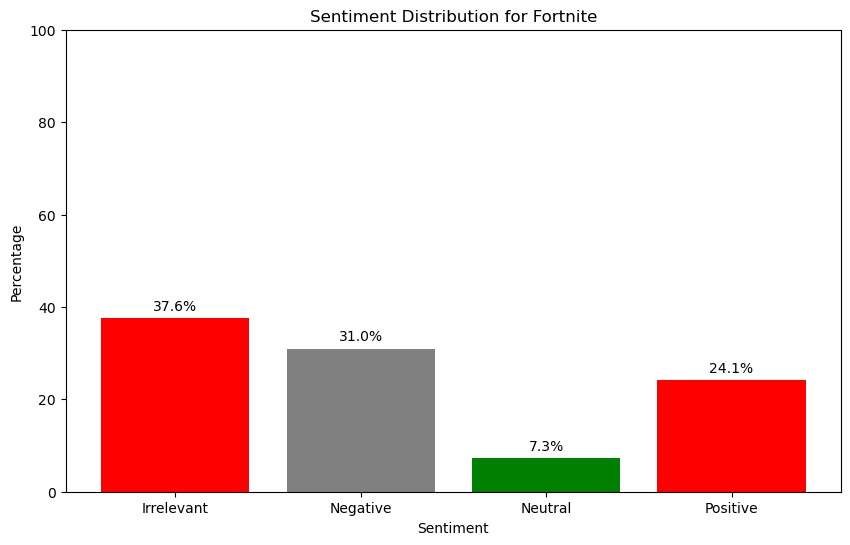

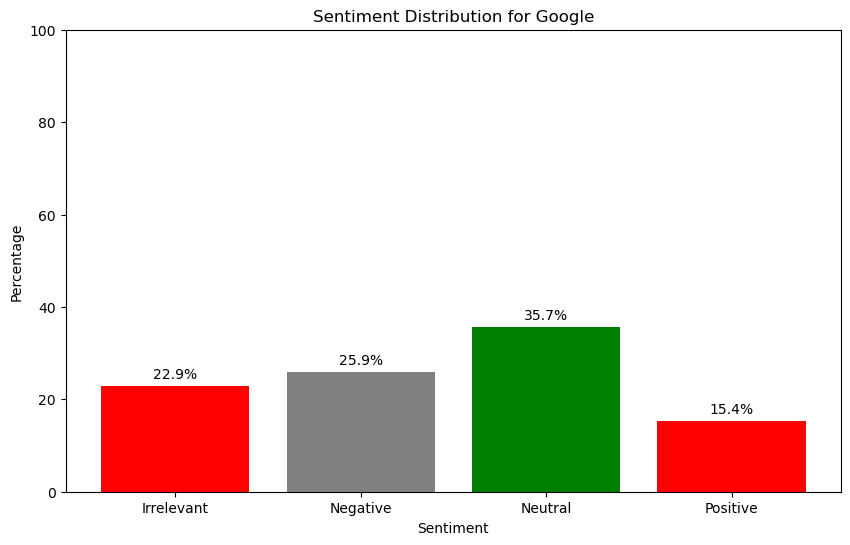

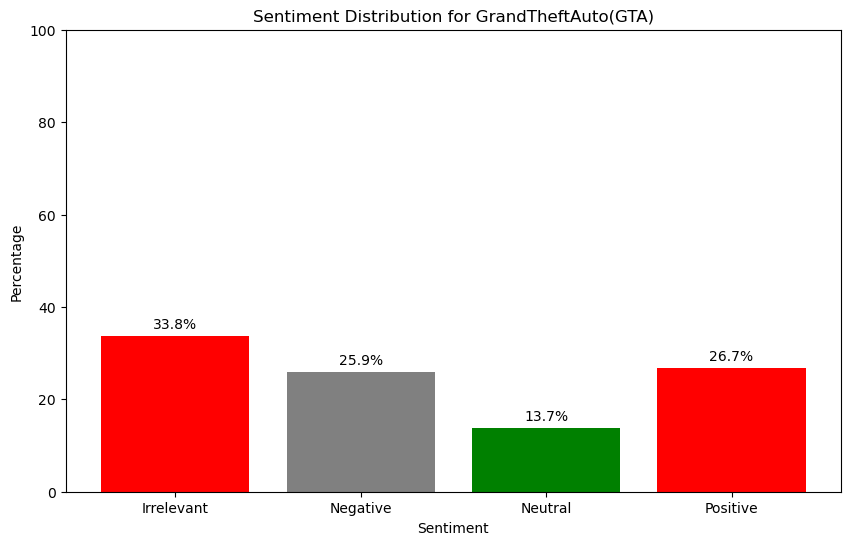

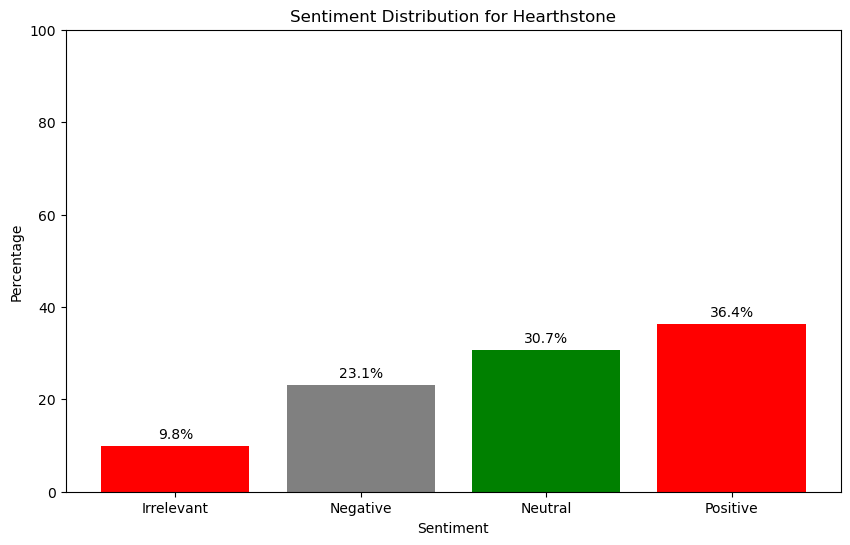

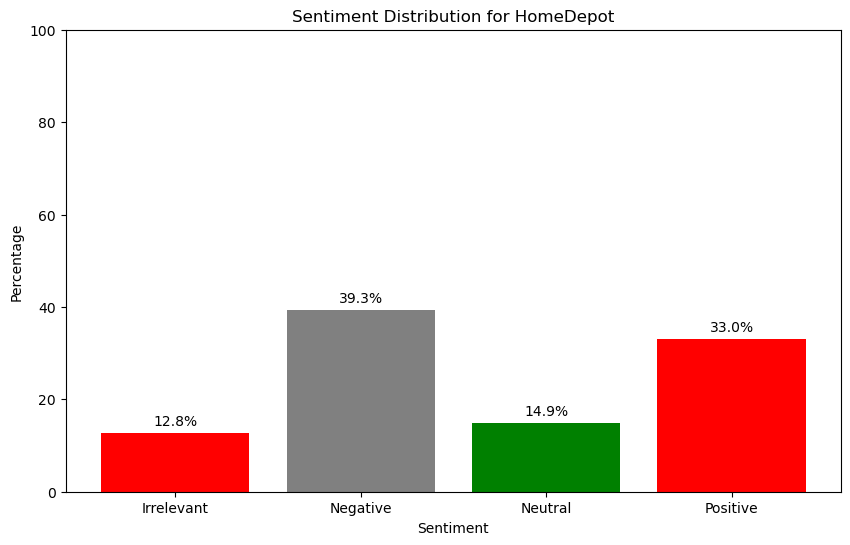

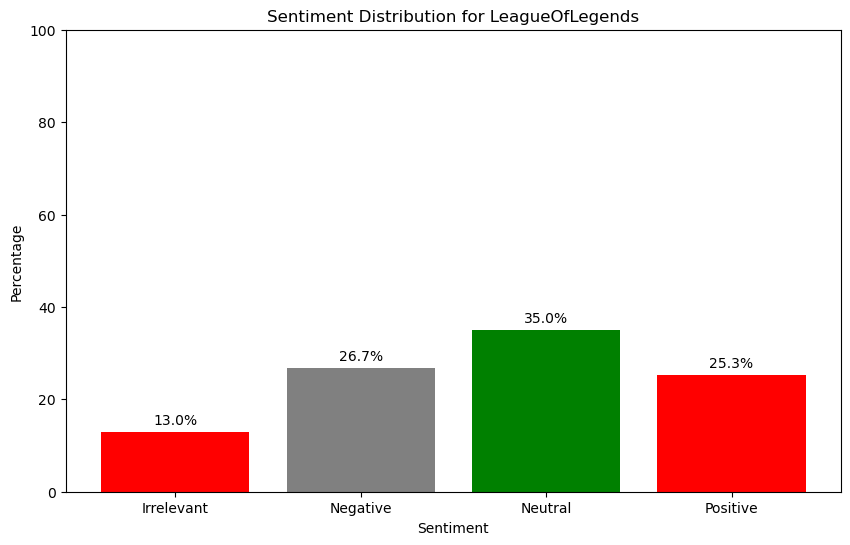

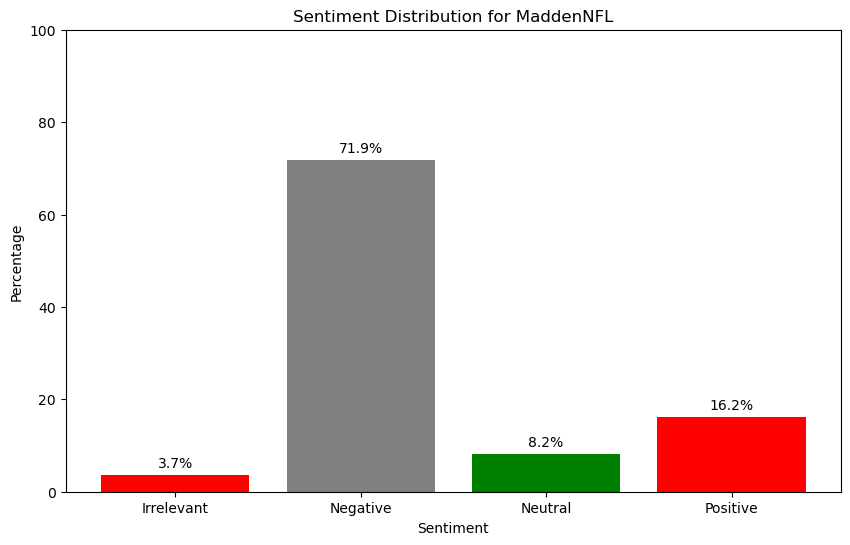

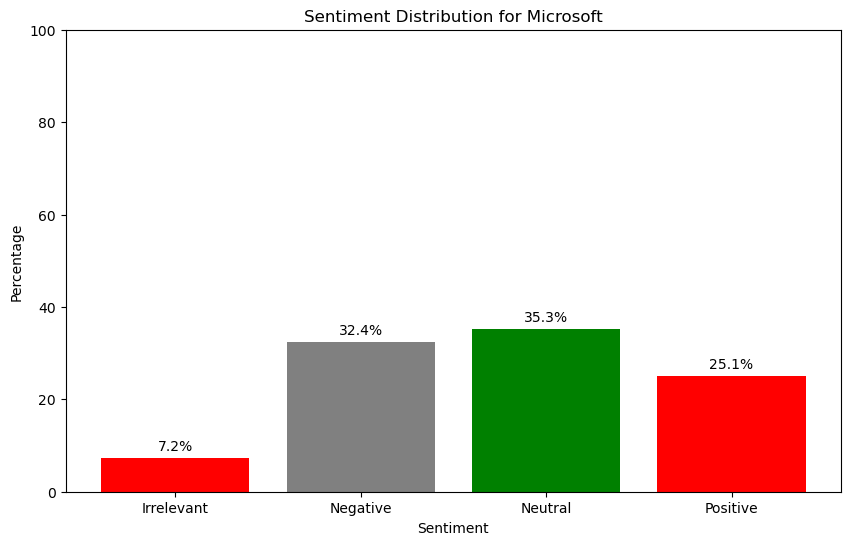

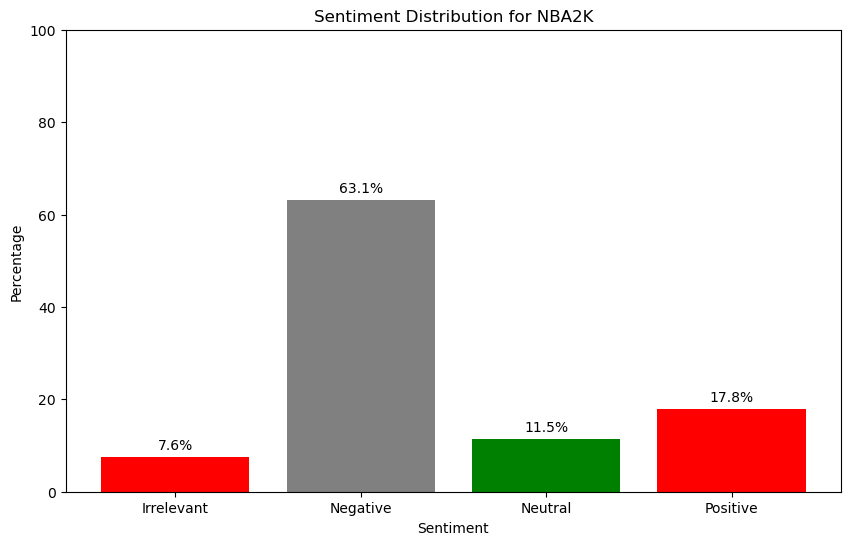

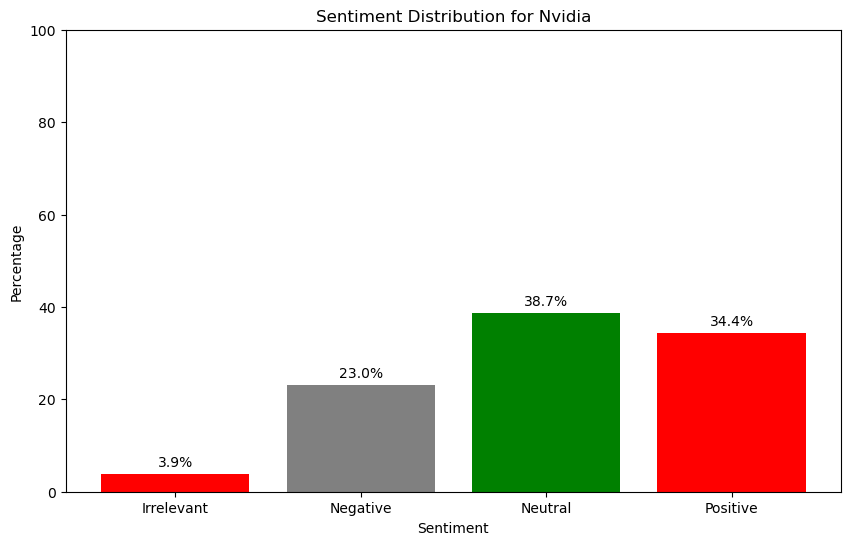

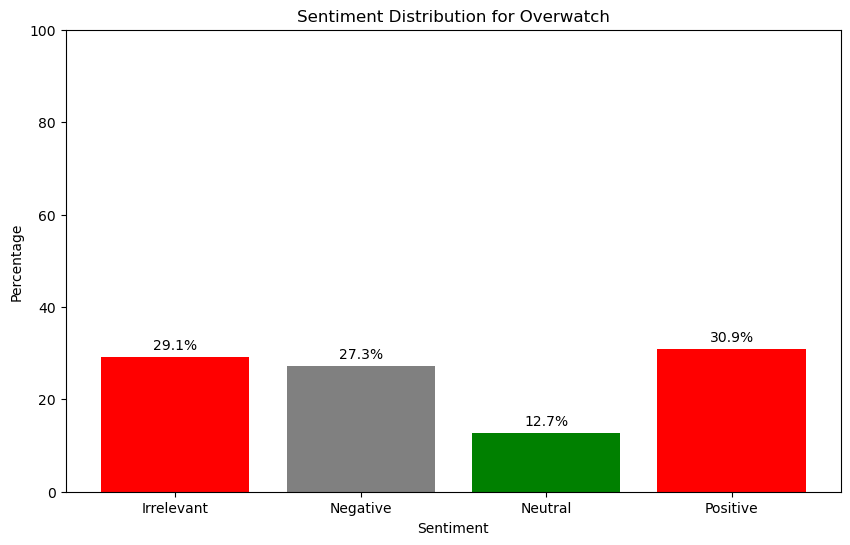

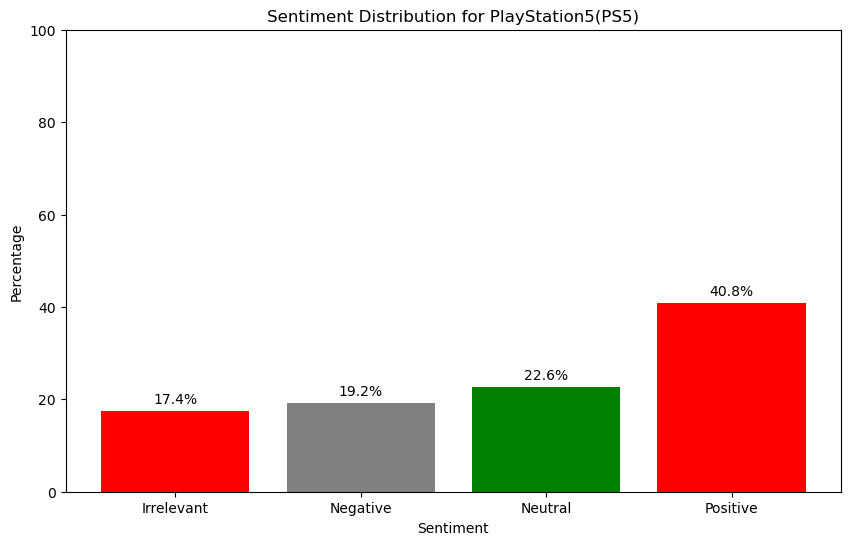

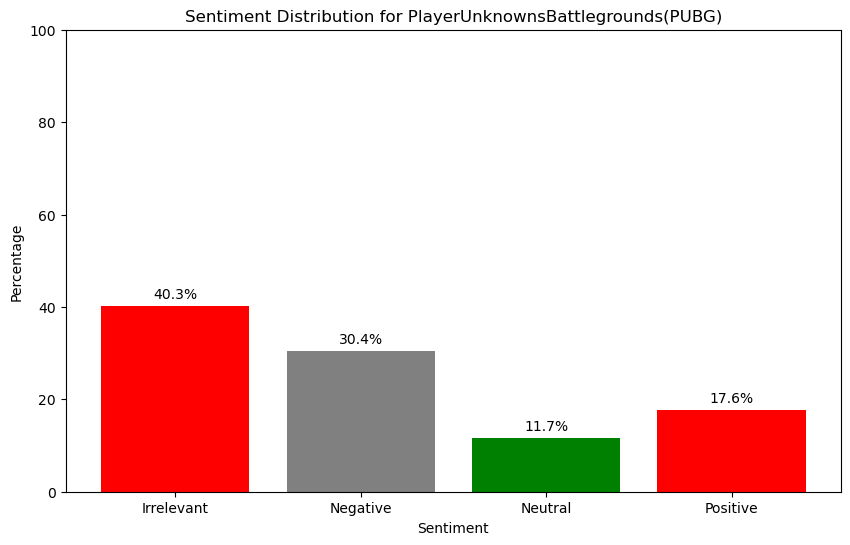

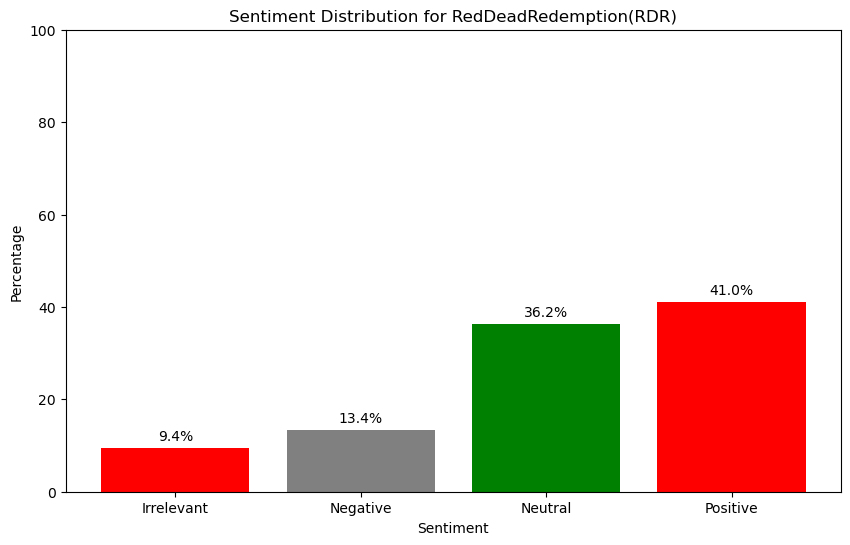

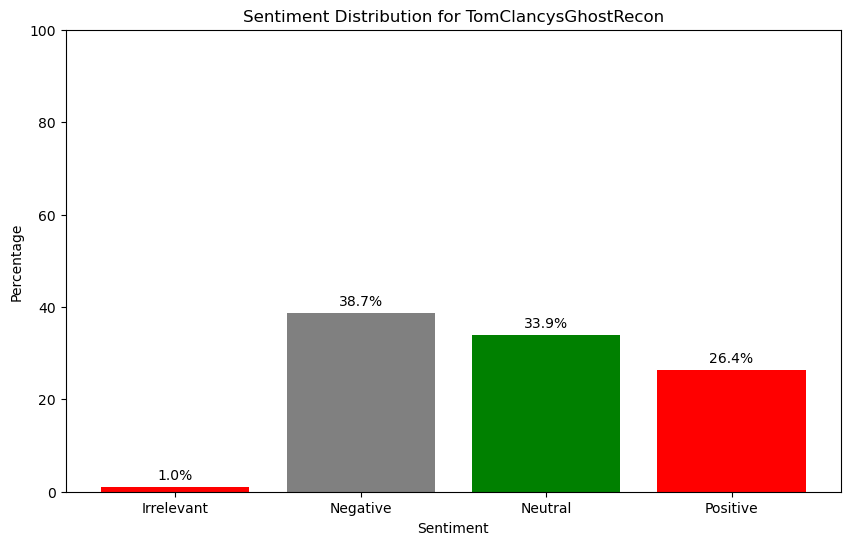

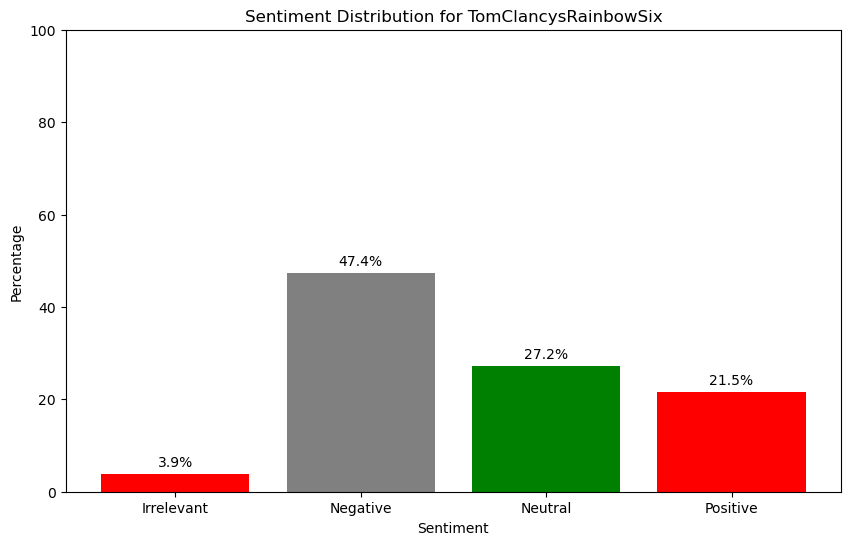

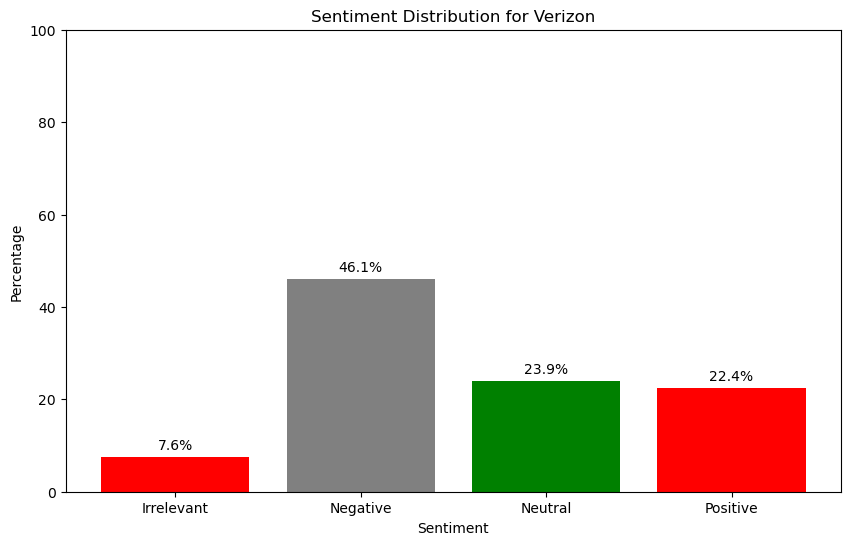

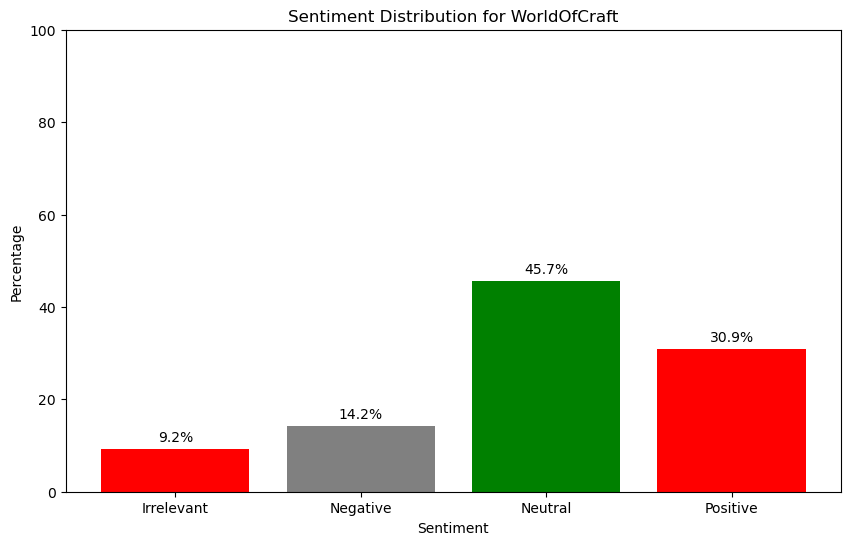

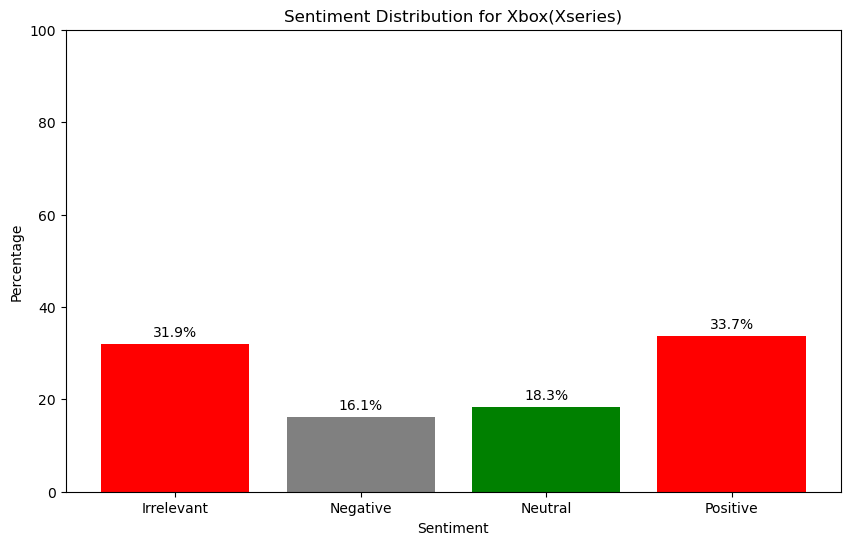

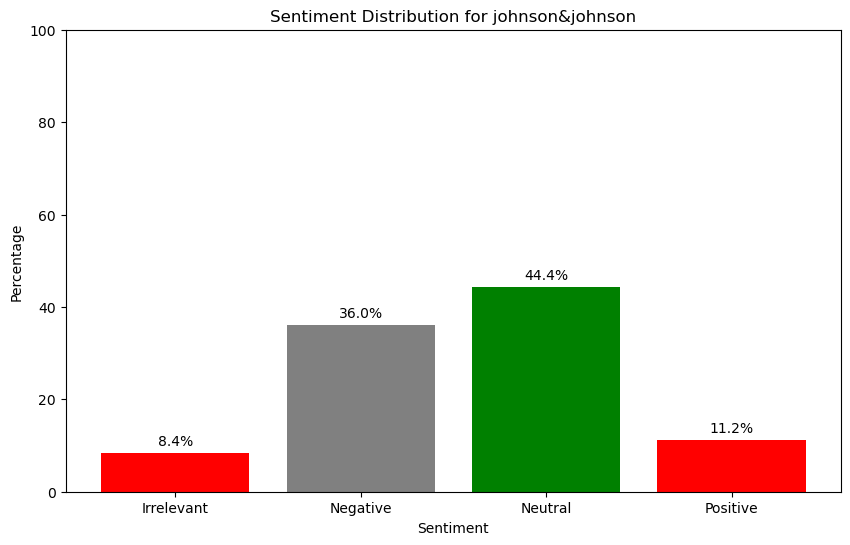

In [50]:
totals = sentiment_counts.sum(axis=1)
percentages = (sentiment_counts.divide(totals, axis=0) * 100).round(1)

for entity, row in percentages.iterrows():
    plt.figure(figsize=(10, 6))

    bars = plt.bar(row.index, row, color=['red', 'gray', 'green'])
    plt.title(f'Sentiment Distribution for {entity}')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

    plt.ylim(0, 100)  
    plt.show()

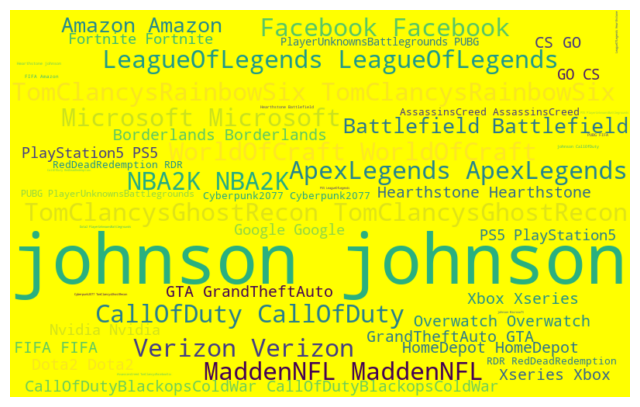

In [51]:
 #Creating word Cloud for all Words in Platform
from wordcloud import WordCloud
allWords = ' '.join([text for text in df['Entity']])
wordcloud = WordCloud(width=800, height=500, random_state=21,background_color='yellow', max_font_size=110).generate(allWords)
plt.figure(figsize=(8, 8)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

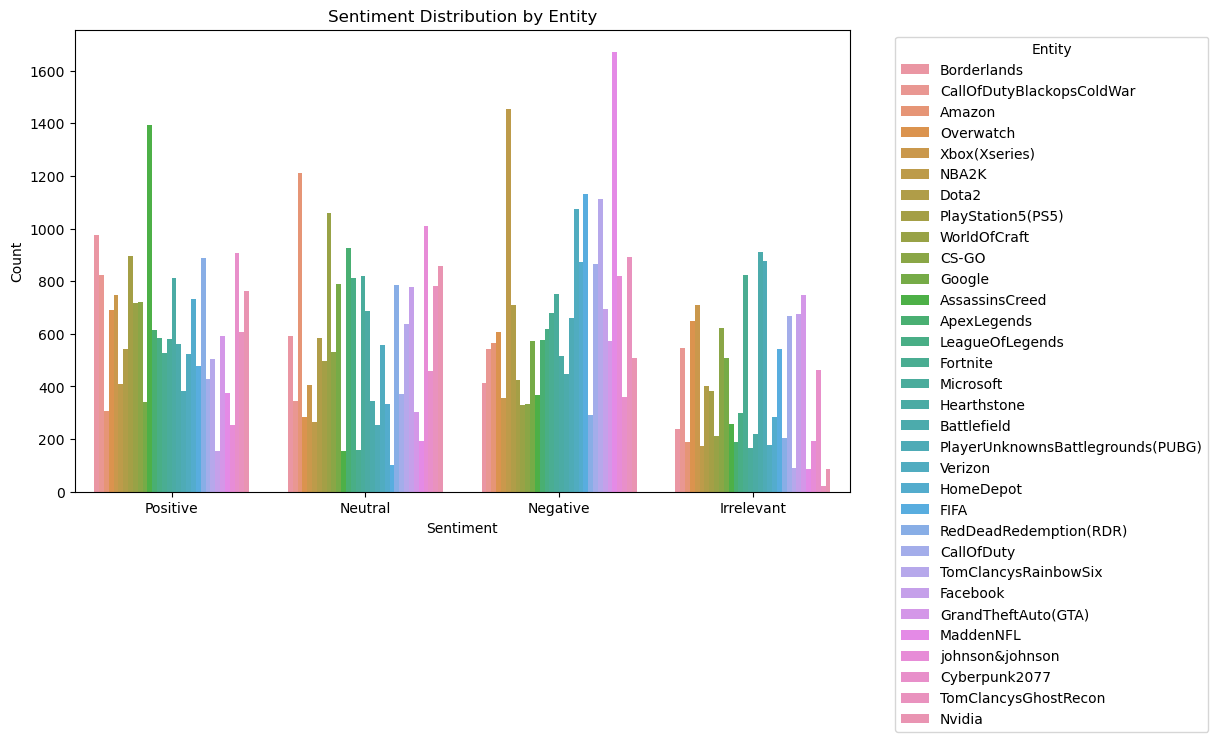

In [52]:
# Example for sentiment distribution by entity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='Entity')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [53]:
# lets Load NLTK stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text with lemmatization and stopwords removal
def preprocess_text(text):
    # Remove special characters, numbers, and links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing with lemmatization and stopwords removal to the 'Content' column
df['Cleaned_Content'] = df['Content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sumitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sumitha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sumitha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NameError: name 'stopwords' is not defined

In [ ]:
# loading vader to perform sentiment analysis
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer without specifying the lexicon file
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis to the 'Cleaned_Content' column
df['Sentiment_Score'] = df['Cleaned_Content'].apply(get_sentiment_scores)

# Categorize sentiment based on the compound score
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
df['Sentiment_Predicted'] = df['Sentiment_Score'].apply(categorize_sentiment)

In [ ]:
# lets Calculate the distribution of predicted sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Create a bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

# Show the bar chart
plt.show()

In [ ]:
# Create a histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

In [ ]:
#Remove short words
df['Tweet_Content'] = df['Tweet_Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
df.head()

In [ ]:
tokenized_tweet = df['Tweet_Content'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

In [ ]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
# stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

In [ ]:
tokenized_tweet.head()

In [ ]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer #Load #training dataset to Pandas and preview the top rows.
from collections import Counter

In [ ]:
df_train['im getting on borderlands and i will murder you all ,'] = df_train['im getting on borderlands and i will murder you all ,'].str.lower()
     

In [ ]:
df_train['im getting on borderlands and i will murder you all ,'].fillna("", inplace = True)
     

In [ ]:
df_train.head()

In [ ]:

df_train.isnull().sum()

In [56]:
df_train.drop(['TweetID'] , axis=1 , inplace=True)
df_valid.drop(['TweetID'] , axis=1 , inplace=True)

In [106]:
#train test split
X_train=df_train.drop(['Sentiment'] , axis=1)
X_test=df_valid.drop(['Sentiment'] , axis=1)
y_train=df_train['Sentiment']
y_test=df_valid['Sentiment']

In [58]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [59]:
#count the no of words in a sentence
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['Tweet_Content'].values.astype('U'))

In [70]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [71]:
y_train

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [75]:
#model
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X,y_train)

MultinomialNB()

In [91]:
Tweet_Content=['I am coming to the borders and I will kill you.']
Tweet_count=vectorizer.fit_transform(Tweet_Content)

In [93]:
Tweet_count

<1x9 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [103]:
Tweet_count.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)